In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

In [35]:
class KMeans:
    def __init__(self, K=5, maxIter=20):
        self.K = K
        self.maxIter = maxIter
        self.centroids = {}

    def calcDistancesFromCentroids(self, datum):
        distances = []
        for key, centroid in self.centroids.items():
            # dist = 0
            # for i in range(datum.shape[0]):
            #     dist += math.pow(datum[i] - centroid[i], 2)
            # distances.append(math.sqrt(dist))
            distances.append(np.linalg.norm(datum - centroid))
        return distances   

    def argmin(self, lst):
        return lst.index(min(lst))     

    def fit(self, data):
        for i in range(self.K):
            self.centroids[i] = data[i]

        sumOfCentroidDistances = []
        for i in range(self.maxIter):
            self.clusterings = {}

            for i in range(self.K):
                self.clusterings[i] = []

            for datum in data:
                clusterID = self.argmin(self.calcDistancesFromCentroids(datum))
                self.clusterings[clusterID].append(datum)

            centroidDistance = 0
            for clusterID, cluster in self.clusterings.items():
                if len(cluster) == 0:
                    continue
                centroidDistance += np.sum(cluster - self.centroids[clusterID])
                self.centroids[clusterID] = np.average(cluster, axis=0)

            sumOfCentroidDistances.append(centroidDistance)


        return sumOfCentroidDistances

    def getMetrics(self):
        meanDists = []
        variances = []

        for clusterID, cluster in self.clusterings.items():
            if len(cluster) == 0:
                meanDists.append('Empty Cluster')
                variances.append('Empty Cluster')
                continue
            meanDists.append(np.mean(cluster, axis=0))
            variances.append(np.var(cluster))

        return meanDists, variances


    def predict(self, datum):
        return self.argmin(self.calcDistancesFromCentroids(datum))

    def getIntraClusterDistances(self):
        distances = []
        for clusterID, cluster in self.clusterings.items():
            if len(cluster) == 0:
                distances.append('Empty Cluster')
                continue
            distance = []
            for datum in cluster:
                distance.append(np.linalg.norm(datum - self.centroids[clusterID]))
            
            distanceVar = np.var(distance)
            distanceVarMean = np.mean(distanceVar)
            distances.append(distanceVarMean)
        
        return distances

    def getInterClusterDistances(self):
        allDistances = []
        for clusterID, cluster in self.clusterings.items():
            distances = []
            if len(cluster) == 0:
                allDistances.append('Empty Cluster')
                continue
            for secClusterID, secCluster in self.clusterings.items():
                if len(secCluster) == 0:
                    continue
                distances.append(np.linalg.norm(self.centroids[clusterID] - self.centroids[secClusterID]))
                
            allDistances.append(np.median(distances))
        return allDistances

                

In [36]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']).to_numpy()
Y = pd.DataFrame(iris.target, columns=['Classes']).to_numpy()

In [37]:
print(X.shape, Y.shape)

(150, 4) (150, 1)


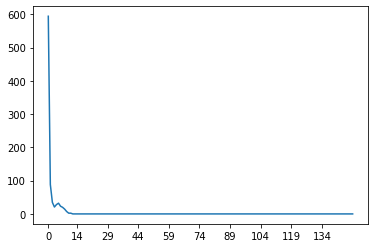


For cluster 0:
Mean Point: [6.9125   3.1      5.846875 2.13125 ]
Variance: 3.947416381835937
Intra-to-Inter Ratio: 0.03676724665999027

For cluster 1:
Mean Point: [6.23658537 2.85853659 4.80731707 1.62195122]
Variance: 3.225313429506246
Intra-to-Inter Ratio: 0.02352678025881536

For cluster 2:
Mean Point: [4.70454545 3.12272727 1.41363636 0.2       ]
Variance: 2.9453499483471073
Intra-to-Inter Ratio: 0.011041682787037736

For cluster 3:
Mean Point: [5.52962963 2.62222222 3.94074074 1.21851852]
Variance: 2.6281172839506173
Intra-to-Inter Ratio: 0.02508160136364661

For cluster 4:
Mean Point: [5.24285714 3.66785714 1.5        0.28214286]
Variance: 3.7128539540816328
Intra-to-Inter Ratio: 0.009558287867482397


In [38]:
model = KMeans(K=5, maxIter=150)
hist = model.fit(X)     

plotX = list(range(len(hist)))
plt.plot(plotX, hist)
xTicks = [plotX[int((len(plotX) - 1) / 10 * i)] for i in range(10)]
plt.xticks(xTicks)
plt.show()

meanDists, variances = model.getMetrics()
interClusterDistances = model.getInterClusterDistances()
intraClusterDistances = model.getIntraClusterDistances()
for i in range(len(meanDists)):
    print('\nFor cluster %d:' % i)
    print('Mean Point:', meanDists[i])
    print('Variance:', variances[i])
    if type(meanDists[i]) == str:
        print('Intra-to-Inter Ratio: Empty Cluster')
    else:
        print('Intra-to-Inter Ratio:', intraClusterDistances[i] / interClusterDistances[i])

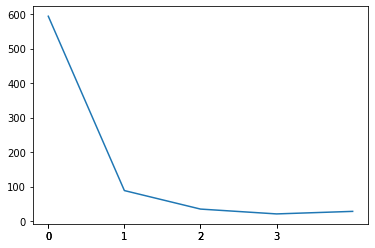


For cluster 0:
Mean Point: [6.69215686 3.01176471 5.54117647 1.98823529]
Variance: 3.756548202614379
Intra-to-Inter Ratio: 0.04997495965493878

For cluster 1:
Mean Point: [5.9        2.77674419 4.36511628 1.39767442]
Variance: 2.9512395213628984
Intra-to-Inter Ratio: 0.0274453838650963

For cluster 2:
Mean Point: [4.70454545 3.12272727 1.41363636 0.2       ]
Variance: 2.9453499483471073
Intra-to-Inter Ratio: 0.01378071145807191

For cluster 3:
Mean Point: [5.2        2.36666667 3.38333333 1.01666667]
Variance: 2.373263888888889
Intra-to-Inter Ratio: 0.004859460734228399

For cluster 4:
Mean Point: [5.24285714 3.66785714 1.5        0.28214286]
Variance: 3.7128539540816328
Intra-to-Inter Ratio: 0.01125042807461833


In [39]:
model = KMeans(K=5, maxIter=5)
hist = model.fit(X)     

plotX = list(range(len(hist)))
plt.plot(plotX, hist)
xTicks = [plotX[int((len(plotX) - 1) / 10 * i)] for i in range(10)]
plt.xticks(xTicks)
plt.show()

meanDists, variances = model.getMetrics()
interClusterDistances = model.getInterClusterDistances()
intraClusterDistances = model.getIntraClusterDistances()
for i in range(len(meanDists)):
    print('\nFor cluster %d:' % i)
    print('Mean Point:', meanDists[i])
    print('Variance:', variances[i])
    if type(meanDists[i]) == str:
        print('Intra-to-Inter Ratio: Empty Cluster')
    else:
        print('Intra-to-Inter Ratio:', intraClusterDistances[i] / interClusterDistances[i])

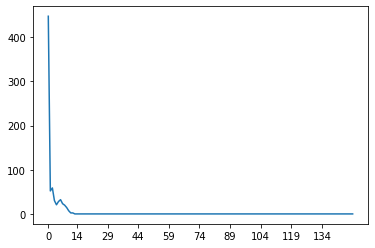


For cluster 0:
Mean Point: [5.36666667 3.53333333 1.5        0.23333333]
Variance: 3.8415972222222217
Intra-to-Inter Ratio: 0.0011626003123771996

For cluster 1:
Mean Point: [4.8875 3.0625 1.45   0.1875]
Variance: 3.113427734375
Intra-to-Inter Ratio: 0.00818742627950527

For cluster 2:
Mean Point: [4.6  3.18 1.42 0.2 ]
Variance: 2.8165
Intra-to-Inter Ratio: 0.007789804340705975

For cluster 3:
Mean Point: [5.52962963 2.62222222 3.94074074 1.21851852]
Variance: 2.6281172839506173
Intra-to-Inter Ratio: 0.023041703367764746

For cluster 4:
Mean Point: [5.4  3.97 1.53 0.29]
Variance: 4.04874375
Intra-to-Inter Ratio: 0.010953275968671333

For cluster 5:
Mean Point: [6.9125   3.1      5.846875 2.13125 ]
Variance: 3.947416381835937
Intra-to-Inter Ratio: 0.018702068630588518

For cluster 6:
Mean Point: [4.6  3.5  1.2  0.25]
Variance: 3.0410937499999995
Intra-to-Inter Ratio: 0.0

For cluster 7:
Mean Point: [5.01333333 3.46       1.50666667 0.28      ]
Variance: 3.2999416666666663
Intra-to-Inte

In [40]:
model = KMeans(K=10, maxIter=150)
hist = model.fit(X)   

plotX = list(range(len(hist)))
plt.plot(plotX, hist)
xTicks = [plotX[int((len(plotX) - 1) / 10 * i)] for i in range(10)]
plt.xticks(xTicks)
plt.show()

meanDists, variances = model.getMetrics()
interClusterDistances = model.getInterClusterDistances()
intraClusterDistances = model.getIntraClusterDistances()
for i in range(len(meanDists)):
    print('\nFor cluster %d:' % i)
    print('Mean Point:', meanDists[i])
    print('Variance:', variances[i])
    if type(meanDists[i]) == str:
        print('Intra-to-Inter Ratio: Empty Cluster')
    else:
        print('Intra-to-Inter Ratio:', intraClusterDistances[i] / interClusterDistances[i])

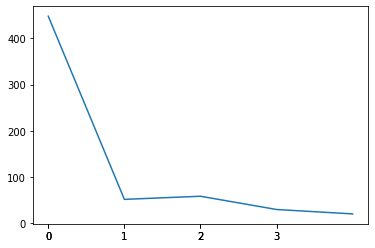


For cluster 0:
Mean Point: [5.36666667 3.53333333 1.5        0.23333333]
Variance: 3.8415972222222217
Intra-to-Inter Ratio: 0.0011626003123771996

For cluster 1:
Mean Point: [4.8875 3.0625 1.45   0.1875]
Variance: 3.113427734375
Intra-to-Inter Ratio: 0.00818742627950527

For cluster 2:
Mean Point: [4.6  3.18 1.42 0.2 ]
Variance: 2.8165
Intra-to-Inter Ratio: 0.007789804340705975

For cluster 3:
Mean Point: [5.    2.3   3.275 1.025]
Variance: 2.125
Intra-to-Inter Ratio: 0.00920556158429787

For cluster 4:
Mean Point: [5.4  3.97 1.53 0.29]
Variance: 4.04874375
Intra-to-Inter Ratio: 0.010953275968671333

For cluster 5:
Mean Point: [6.63220339 2.99830508 5.43050847 1.93728814]
Variance: 3.6989404984199945
Intra-to-Inter Ratio: 0.032787718637910704

For cluster 6:
Mean Point: [4.6  3.5  1.2  0.25]
Variance: 3.0410937499999995
Intra-to-Inter Ratio: 0.0

For cluster 7:
Mean Point: [5.01333333 3.46       1.50666667 0.28      ]
Variance: 3.2999416666666663
Intra-to-Inter Ratio: 0.01452047995556

In [41]:
model = KMeans(K=10, maxIter=5)
hist = model.fit(X)   

plotX = list(range(len(hist)))
plt.plot(plotX, hist)
xTicks = [plotX[int((len(plotX) - 1) / 10 * i)] for i in range(10)]
plt.xticks(xTicks)
plt.show()

meanDists, variances = model.getMetrics()
interClusterDistances = model.getInterClusterDistances()
intraClusterDistances = model.getIntraClusterDistances()
for i in range(len(meanDists)):
    print('\nFor cluster %d:' % i)
    print('Mean Point:', meanDists[i])
    print('Variance:', variances[i])
    if type(meanDists[i]) == str:
        print('Intra-to-Inter Ratio: Empty Cluster')
    else:
        print('Intra-to-Inter Ratio:', intraClusterDistances[i] / interClusterDistances[i])

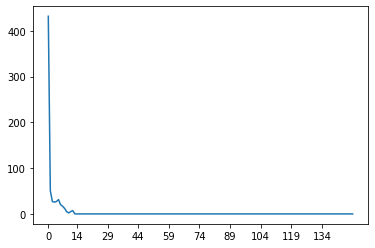


For cluster 0:
Mean Point: [5.1        3.42857143 1.44285714 0.21428571]
Variance: 3.492487244897959
Intra-to-Inter Ratio: 0.0017292135077124479

For cluster 1:
Mean Point: [4.92 3.06 1.42 0.22]
Variance: 3.1324750000000003
Intra-to-Inter Ratio: 0.007346500958401732

For cluster 2:
Mean Point: [4.6  3.18 1.42 0.2 ]
Variance: 2.8165
Intra-to-Inter Ratio: 0.0058968961982989124

For cluster 3:
Mean Point: [5.    2.3   3.275 1.025]
Variance: 2.125
Intra-to-Inter Ratio: 0.009096304347563691

For cluster 4:
Mean Point: [4.96666667 3.56666667 1.36666667 0.2       ]
Variance: 3.4518750000000007
Intra-to-Inter Ratio: 0.0025271302020545314

For cluster 5:
Mean Point: [6.2525 2.855  4.815  1.625 ]
Variance: 3.2447652343749995
Intra-to-Inter Ratio: 0.00810248483874434

For cluster 6:
Mean Point: [4.6  3.5  1.2  0.25]
Variance: 3.0410937499999995
Intra-to-Inter Ratio: 0.0

For cluster 7:
Mean Point: [4.925 3.375 1.7   0.325]
Variance: 3.0102734374999995
Intra-to-Inter Ratio: 0.003761740457197648



In [42]:
model = KMeans(K=20, maxIter=150)
hist = model.fit(X)   
plotX = list(range(len(hist)))
plt.plot(plotX, hist)
xTicks = [plotX[int((len(plotX) - 1) / 10 * i)] for i in range(10)]
plt.xticks(xTicks)
plt.show()

meanDists, variances = model.getMetrics()
interClusterDistances = model.getInterClusterDistances()
intraClusterDistances = model.getIntraClusterDistances()
for i in range(len(meanDists)):
    print('\nFor cluster %d:' % i)
    print('Mean Point:', meanDists[i])
    print('Variance:', variances[i])
    if type(meanDists[i]) == str:
        print('Intra-to-Inter Ratio: Empty Cluster')
    else:
        print('Intra-to-Inter Ratio:', intraClusterDistances[i] / interClusterDistances[i])

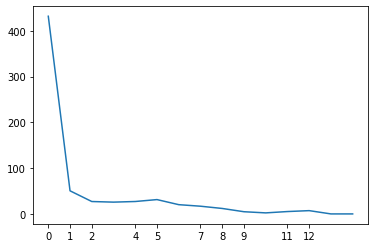


For cluster 0:
Mean Point: [5.1        3.42857143 1.44285714 0.21428571]
Variance: 3.492487244897959
Intra-to-Inter Ratio: 0.0017292135077124479

For cluster 1:
Mean Point: [4.92 3.06 1.42 0.22]
Variance: 3.1324750000000003
Intra-to-Inter Ratio: 0.007346500958401732

For cluster 2:
Mean Point: [4.6  3.18 1.42 0.2 ]
Variance: 2.8165
Intra-to-Inter Ratio: 0.0058968961982989124

For cluster 3:
Mean Point: [5.    2.3   3.275 1.025]
Variance: 2.125
Intra-to-Inter Ratio: 0.009096304347563691

For cluster 4:
Mean Point: [4.96666667 3.56666667 1.36666667 0.2       ]
Variance: 3.4518750000000007
Intra-to-Inter Ratio: 0.0025271302020545314

For cluster 5:
Mean Point: [6.2525 2.855  4.815  1.625 ]
Variance: 3.2447652343749995
Intra-to-Inter Ratio: 0.00810248483874434

For cluster 6:
Mean Point: [4.6  3.5  1.2  0.25]
Variance: 3.0410937499999995
Intra-to-Inter Ratio: 0.0

For cluster 7:
Mean Point: [4.925 3.375 1.7   0.325]
Variance: 3.0102734374999995
Intra-to-Inter Ratio: 0.003761740457197648



In [43]:
model = KMeans(K=20, maxIter=15)
hist = model.fit(X)   
plotX = list(range(len(hist)))
plt.plot(plotX, hist)
xTicks = [plotX[int((len(plotX) - 1) / 10 * i)] for i in range(10)]
plt.xticks(xTicks)
plt.show()

meanDists, variances = model.getMetrics()
interClusterDistances = model.getInterClusterDistances()
intraClusterDistances = model.getIntraClusterDistances()
for i in range(len(meanDists)):
    print('\nFor cluster %d:' % i)
    print('Mean Point:', meanDists[i])
    print('Variance:', variances[i])
    if type(meanDists[i]) == str:
        print('Intra-to-Inter Ratio: Empty Cluster')
    else:
        print('Intra-to-Inter Ratio:', intraClusterDistances[i] / interClusterDistances[i])